# Global Terrorism Database
## Exploratory Data Analysis

Prepared by: Keina Aoki

Date: January 2024

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

### Data Dictionary

#### Global Terrorism Database ID and Date

| Variable Name |Data Type|Description |
|:------|:-----|:------|
| eventid | Numeric |unique id made up of date recorded and sequential case number for the given day|
| iyear | Numeric |year in which the incident occurred|
| imonth | Numeric |number of the month in which the incident occurred|
| iday | Numeric |numeric day of the month on which the incident occurred|
| extended | Categorical |when the duration of an incident extended more than 24 hours (1="Yes", 0="No")|

#### Incident Location 
    
| Variable Name |Data Type |Description |
|:------|:-----|:-----|
| country, countrytxt | Categorical | country or location where the incident occurred, or "Uknown" otherwise|
| region, regiontxt | Categorical |region in which the incident occurred|
| provstate | Object (text) |name (at the time of event) of the 1st order subnational administrative region in which the event occurs|
| city | Object (text) |name of the city, village, or town in which the incident occurred, if unknown smallest administrative area below provstate can be found|
| latitude | Numeric |latitude of the *city* in which the event occurred|
| longitude | Numeric |longitude of the *city* in which the event occurred|
| summary | Object (text) |a brief narrative summary of the incident, noting the "when, where, who, what, how and why"|
| crit1 | Categorical |violent act aimed at attaining a political, economic, religious, or social goal, (1="Yes", 0="No")|
| crit2 | Categorical |has evidence of an intention to coerce, intimidate, or convey some other message to a larger audience, (1="Yes", 0="No")| 
| crit3 | Categorical |action is outside the context of legitimate warfare activites, it targets non-combatants, (1="Yes", 0="No")|
| doubtterr | Categorical |uncertainty whether an incident meets all the critera for inclusion, (1="Yes", 0="No", -9="Unknown")|
| mulitple | Categorical |cases where several attacks are connected, but where the various actions do not constitute a single incident, (1="Yes", 0="No", -9=")|

#### Attack Information
    
| Variable Name |Data Type |Description |
|:------|:-----|:-----|
| success | Categorical |whether or not, (1="Yes", 0="No")|
| suicide | Categorical |cases where there is evidence that the perpetrator did not intend to escape from the attack alive, (1="Yes", 0="No")|
| attacktype1, attacktype1_txt | Categorical |general method of attack|
    
#### Target/Victim Information
    
| Variable Name |Data Type |Description |
|:------|:-----|:-----|
| targtype1, targtype1_txt | Object (text) |general type of target/victim and reflects motive |
| targsubtype1, targsubtype1_txt | Categorical |captures more specific target category|
| corp | Object (text) |name of the corporate entity or government agency that was targeted, "unknown" for unspecified and "not applicable" otherwise|
|target1 | Object (text) |specific person, building, installation, etc. that was targeted and/or victimized and is part of the entity named in corp|
| natlty1, natlty1_txt | Categorical |nationality of the target that was attacked, and is not necessarily the same as the country in which the incident occurred|
    

#### Perpetrator Information
    
| Variable Name |Data Type|Description |
|:------|:-----|:-----|
| gname | Object (text) |name of the group that carried out the attack|
| guncertain1 | Categorical | the perpetrator attribution(s) for the incident are suspected, (1="Yes", 0="No", -9="Unknown")|
| individual | Categorical | whether or not the attack was carried out by an individual or several individuals not known to be affiliated with a group or organization,  (1="Yes", 0="No")|
| nperps | Numeric | total number of terrorist participated in the incident | 
| nperpcap | Numeric | number of perpetrators taken into custody, NaN appears when there is evidence of captured but the number is not reported|
| claimed | Categorical | whether a group or person(s) claimed responsibility for the attack, (1="Yes", 0="No", -9="Unknown")|
| motive | Object (text) | when reports explicitly mention a specific motive for the attack |

#### Weapon Information

| Variable Name |Data Type|Description |
|:------|:-----|:-----|
| weaptype1, weaptype1_txt | Categorical | type of weapon used in the incident |
| weapsubtype1, weapsubtype1_txt | Categorical | subtype of weapon used in the incident|

#### Casualties and Consequences
    
| Variable Name | Data Type | Description |
|:------|:-----|:-----|
| nkill | Numeric | number of total confirmed fatailities for the incident, includes all victims and attackers who died as a direct result of the incident|
| nkillus | Numeric | number of U.S. citizens and U.S. perpetrators who died as a result of the incident, includes incidents occurring outside of the U.S. |
| nkillter | Numeric | number of perpetrator fatalities|
| nwound | Numeric | number of confirmed non-fatal injuries to both perpetrators and victims|
| nwoundus | Numeric | number of non-fatal injuries to U.S. citizens, both perpetrators and victims|
| nwounte | Numeric | number of perpetrators injured|
| property | Categorical | evidence of property damage from the incident, (1="Yes", 0="No", -9="Unknown")|
| ishostkid | Categorical | whether ot not the victims were taken hostage. or kidnapped during an event, (1="Yes", 0="No", -9="Unknown")|
| nhostkid | Numeric | total number of hostages or kidnapping victims, for successful hijackings, total number of crew members and passengers aboard the vehicle|

#### Additional Information
| Variable Name | Data Type |Description |
|:------|:-----|:------|
| INT_LOG | Categorical | whether a perpetrator group crossed a border to carry out an attack (usually a national border), (1="Yes", 0="No", -9="Unknown")|
| INT_IDEO | Categorical | whehter a perpatrator group attacked a target of a different nationalty, (1="Yes", 0="No", -9="Unknown") |
| INT_MISC | Categorical | whether a perpatrator group attacked a target of a different nationality, does not require information about nationality of perpatrator group, (1="Yes", 0="No", -9="Unknown")|
| INT_ANY | Categorical | any of INT_LOG, INT_IDEO, or INT_MISC, (1="Yes", 0="No", -9="Unknown") |

### Load and Inspect Dataset

In [2]:
df = pd.read_csv("gtd1.csv")
df.head()

,eventid,iyear,imonth,iday,extended,country,country_txt,region,region_txt,provstate,...,nkillter,nwound,nwoundus,nwoundte,property,ishostkid,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
0,197000000001,1970,7,2,0,58,Dominican Republic,2,Central America & Caribbean,National,...,NaN,0.0,NaN,NaN,0,0.0,0,0,0,0
1,197000000002,1970,0,0,0,130,Mexico,1,North America,Federal,...,NaN,0.0,NaN,NaN,0,1.0,0,1,1,1
2,197001000001,1970,1,0,0,160,Philippines,5,Southeast Asia,Tarlac,...,NaN,0.0,NaN,NaN,0,0.0,-9,-9,1,1
3,197001000002,1970,1,0,0,78,Greece,8,Western Europe,Attica,...,NaN,NaN,NaN,NaN,1,0.0,-9,-9,1,1
4,197001000003,1970,1,0,0,101,Japan,4,East Asia,Fukouka,...,NaN,NaN,NaN,NaN,1,0.0,-9,-9,1,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209706 entries, 0 to 209705
Data columns (total 53 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   eventid           209706 non-null  int64  
 1   iyear             209706 non-null  int64  
 2   imonth            209706 non-null  int64  
 3   iday              209706 non-null  int64  
 4   extended          209706 non-null  int64  
 5   country           209706 non-null  int64  
 6   country_txt       209706 non-null  object 
 7   region            209706 non-null  int64  
 8   region_txt        209706 non-null  object 
 9   provstate         209706 non-null  object 
 10  city              209706 non-null  object 
 11  latitude          205015 non-null  float64
 12  longitude         205014 non-null  float64
 13  summary           209706 non-null  object 
 14  crit1             209706 non-null  int64  
 15  crit2             209706 non-null  int64  
 16  crit3             20

There is a total of 181,691 rows and 54 columns. 18 columns are floating point decimals, 21 columns are integers, and 15 columns are objects.

In [4]:
pd.set_option('display.max_columns', None)
df.tail()

,eventid,iyear,imonth,iday,extended,country,country_txt,region,region_txt,provstate,city,latitude,longitude,summary,crit1,crit2,crit3,doubtterr,multiple,success,suicide,attacktype1,attacktype1_txt,targtype1,targtype1_txt,targsubtype1,targsubtype1_txt,corp1,target1,natlty1,natlty1_txt,gname,guncertain1,individual,nperps,nperpcap,claimed,weaptype1,weaptype1_txt,weapsubtype1,weapsubtype1_txt,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,ishostkid,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
209701,202012310015,2020,12,31,0,228,Yemen,10,Middle East & North Africa,Al Hudaydah,Sabaa,15.305307,43.019490,12/31/2020: Assailants fired mortar shells tar...,1,1,1,0,0.0,1,0,3,Bombing/Explosion,14,Private Citizens & Property,76.0,House/Apartment/Residence,Not Applicable,Residences,228.0,Yemen,Houthi extremists (Ansar Allah),0.0,0,-99.0,NaN,0.0,6,Explosives,11.0,"Projectile (rockets, mortars, RPGs, etc.)",NaN,0.0,0.0,NaN,0.0,0.0,1,0.0,0,0,0,0
209702,202012310016,2020,12,31,0,228,Yemen,10,Middle East & North Africa,Al Hudaydah,Beit Maghari,13.931337,43.478924,12/31/2020: Assailants attempted to plant expl...,1,1,1,0,0.0,1,0,3,Bombing/Explosion,14,Private Citizens & Property,76.0,House/Apartment/Residence,Not Applicable,Residences,228.0,Yemen,Houthi extremists (Ansar Allah),0.0,0,-99.0,NaN,0.0,6,Explosives,8.0,Landmine,NaN,0.0,NaN,NaN,0.0,NaN,0,0.0,0,0,0,0
209703,202012310017,2020,12,31,0,75,Germany,8,Western Europe,Lower Saxony,Leipzig,51.342239,12.374772,12/31/2020: Assailants set fire to German Army...,1,1,0,1,0.0,1,0,7,Facility/Infrastructure Attack,4,Military,35.0,Military Transportation/Vehicle (excluding con...,German Army,Wolf-Class Vehicles,75.0,Germany,Left-wing extremists,0.0,0,-99.0,NaN,1.0,8,Incendiary,18.0,Arson/Fire,0.0,0.0,0.0,0.0,0.0,0.0,1,0.0,-9,-9,0,-9
209704,202012310018,2020,12,31,0,4,Afghanistan,6,South Asia,Kabul,Kabul,34.523842,69.140304,12/31/2020: Assailants shot and killed a civil...,1,1,1,0,0.0,1,0,2,Armed Assault,14,Private Citizens & Property,83.0,Protester,Not Applicable,Activist: Abdi Jahid,4.0,Afghanistan,Unknown,0.0,0,-99.0,NaN,0.0,5,Firearms,5.0,Unknown Gun Type,1.0,0.0,0.0,0.0,0.0,0.0,0,0.0,-9,-9,0,-9
209705,202012310019,2020,12,31,1,33,Burkina Faso,11,Sub-Saharan Africa,Sahel,Kelbo,13.864252,-1.161453,12/31/2020: Assailants attacked a Volunteers o...,1,1,0,1,0.0,1,0,2,Armed Assault,4,Military,39.0,Paramilitary,Volunteers of the Defence of the Fatherland (VDP),Paramilitary Position,33.0,Burkina Faso,Unknown,0.0,0,-99.0,NaN,0.0,5,Firearms,5.0,Unknown Gun Type,5.0,0.0,0.0,0.0,0.0,0.0,0,-9.0,-9,-9,0,-9


### Distribution of Incidents

#### Distribution of Incidents by Date

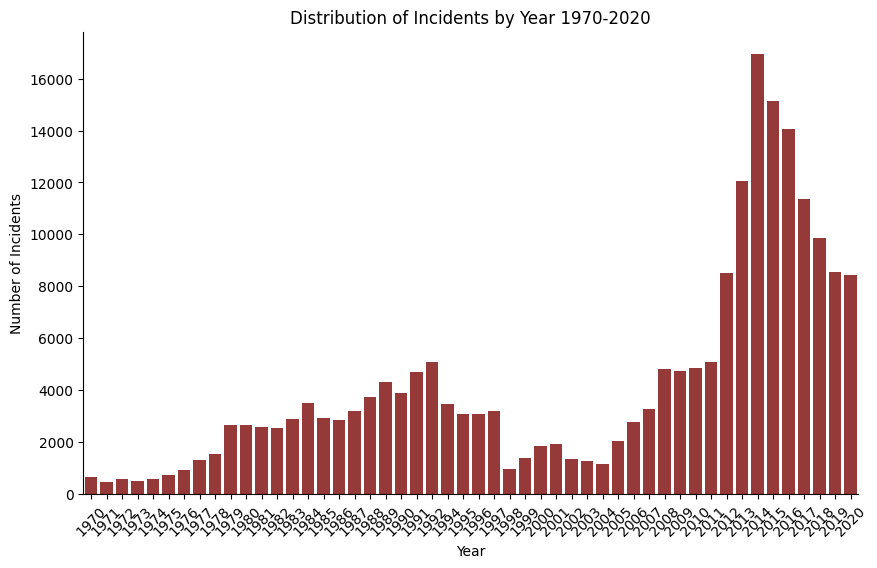

In [5]:
### Year ###


plt.figure(figsize=(10,6))
sns.countplot(x="iyear", data=df, color="brown")
plt.title("Distribution of Incidents by Year 1970-2020")
plt.xlabel("Year")
plt.xticks(rotation=45)
plt.ylabel("Number of Incidents")
sns.despine()
plt.show()

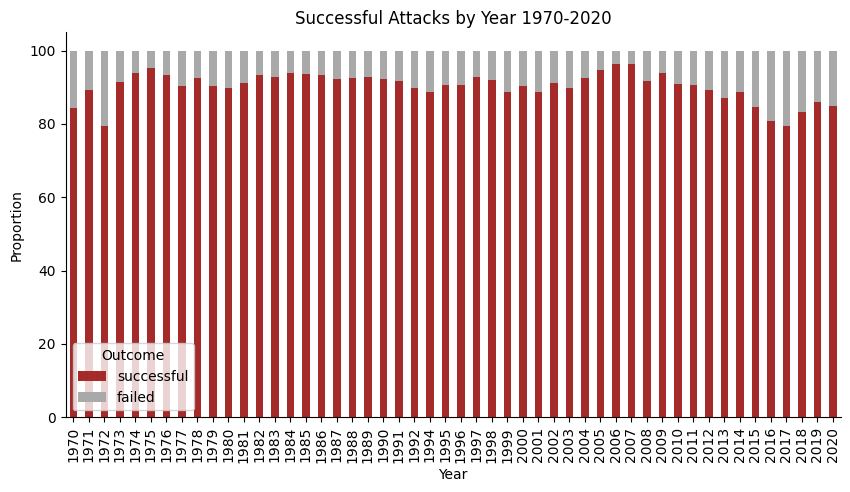

In [6]:
### Successful Attack by Year ###


# Group year and success variables in a dataframe
success_year = df.groupby(["iyear", "success"])["success"].count() / df.groupby("iyear")["success"].count()* 100
success_yeardf = success_year.unstack()[[1,0]].sort_values("iyear")

# Plot
success_yeardf.plot(kind="bar", stacked=True, color=["brown", "darkgrey"], figsize=(10,5))
plt.title("Successful Attacks by Year 1970-2020")
plt.xlabel("Year")
plt.ylabel("Proportion")
plt.legend(labels=["successful", "failed"], title="Outcome", loc="lower left")
sns.despine()
plt.show()

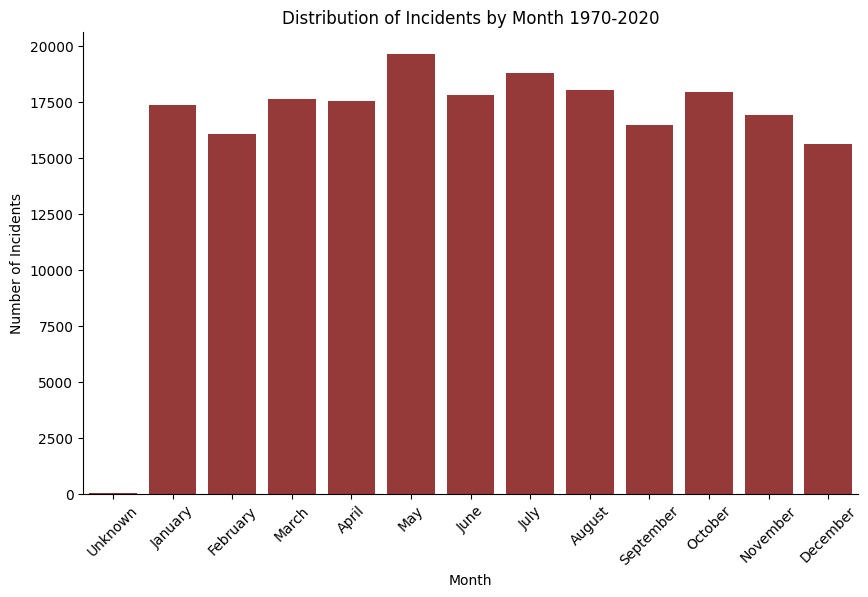

In [7]:
### Month ###

plt.figure(figsize=(10,6))
sns.countplot(x="imonth", data=df, color="brown")
plt.title("Distribution of Incidents by Month 1970-2020")
plt.xlabel("Month")
plt.xticks(ticks=range(13),labels=["Unknown", "January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"], rotation=45)
plt.ylabel("Number of Incidents")
sns.despine()
plt.show()

#### Distribution of Incidents by Location

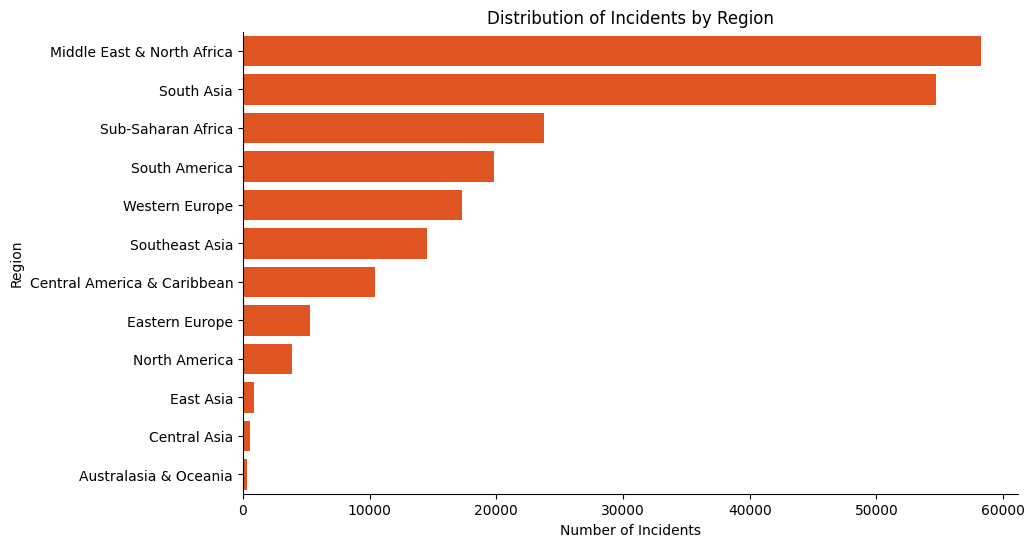

In [8]:
### Region ###

plt.figure(figsize=(10,6))
sns.countplot(y="region_txt", data=df, color="orangered", orient="h", order=df["region_txt"].value_counts().index)
plt.title("Distribution of Incidents by Region")
plt.xlabel("Number of Incidents")
plt.ylabel("Region")
sns.despine()
plt.show()

In [9]:
### Country ###

country = df.groupby(["country_txt"]).count().sort_values(by="eventid", ascending=False)[0:20].reset_index()
country = country[["country_txt", "eventid"]]

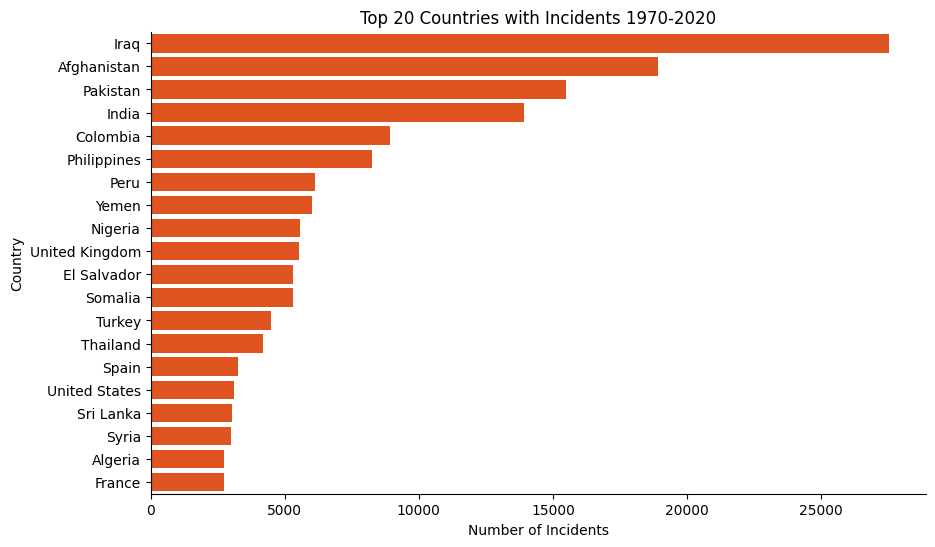

In [10]:
plt.figure(figsize=(10,6))
sns.barplot(x= "eventid", y="country_txt", data=country, color="orangered", orient="h")
plt.title("Top 20 Countries with Incidents 1970-2020")
plt.xlabel("Number of Incidents")
plt.ylabel("Country")
sns.despine()
plt.show()

#### Distribution of Incidents by Attack Type

In [11]:
### Weapon Type ###

# Rename one of categories to shorten label
df.loc[df["weaptype1_txt"] == "Vehicle (not to include vehicle-borne explosives, i.e., car or truck bombs)", "weaptype1_txt"] = "Vehicle (non-explosives)"

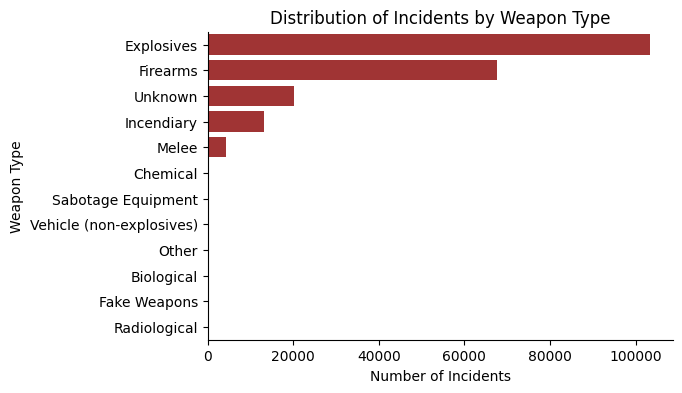

In [12]:
plt.figure(figsize=(6,4))
sns.countplot(y="weaptype1_txt", data=df, color="firebrick", orient="h", order=df["weaptype1_txt"].value_counts().index)
plt.title("Distribution of Incidents by Weapon Type")
plt.xlabel("Number of Incidents")
plt.ylabel("Weapon Type")
sns.despine()
plt.show()

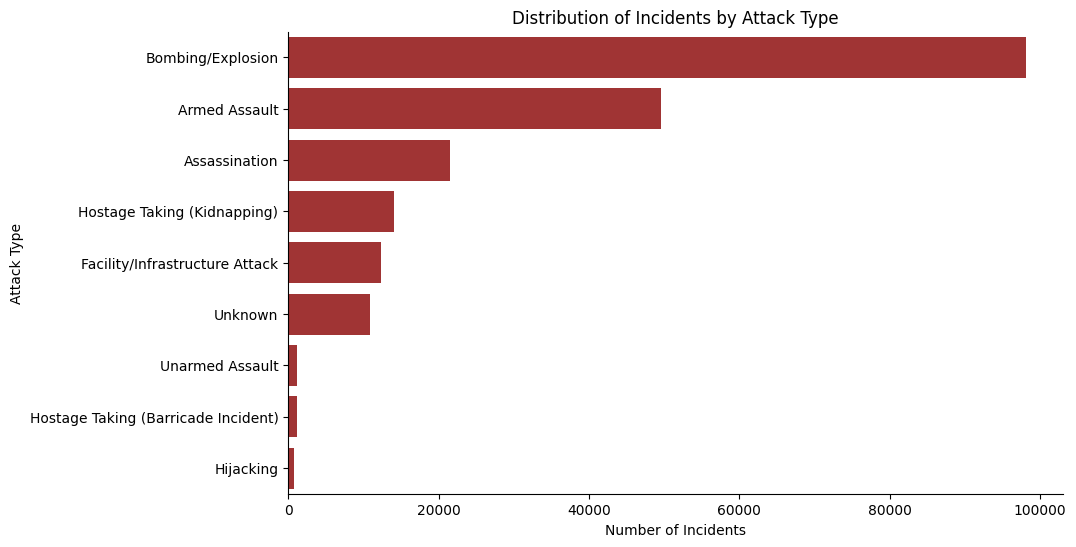

In [13]:
### Attack Type ###

plt.figure(figsize=(10,6))
sns.countplot(y="attacktype1_txt", data=df, color="firebrick", orient="h", order=df["attacktype1_txt"].value_counts().index)
plt.title("Distribution of Incidents by Attack Type")
plt.xlabel("Number of Incidents")
plt.ylabel("Attack Type")
sns.despine()
plt.show()

#### Distribution of Incidents by Target Type

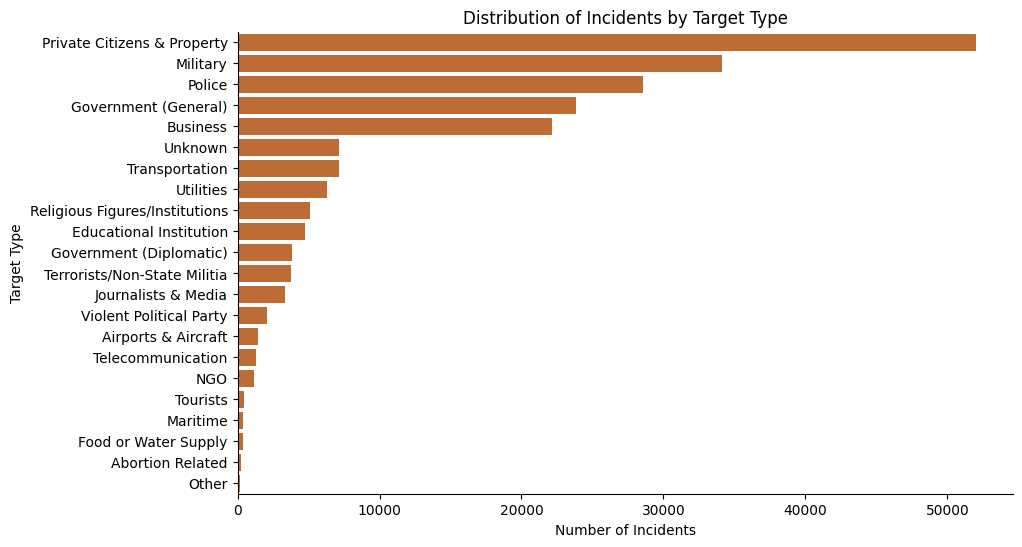

In [14]:
plt.figure(figsize=(10,6))
sns.countplot(y="targtype1_txt", data=df, color="chocolate", orient="h", order=df["targtype1_txt"].value_counts().index)
plt.title("Distribution of Incidents by Target Type")
plt.xlabel("Number of Incidents")
plt.ylabel("Target Type")
sns.despine()
plt.show()

In [15]:
target = df.groupby(["natlty1_txt"]).count().sort_values(by="eventid", ascending=False)[0:20].reset_index()
target = target[["natlty1_txt", "eventid"]]

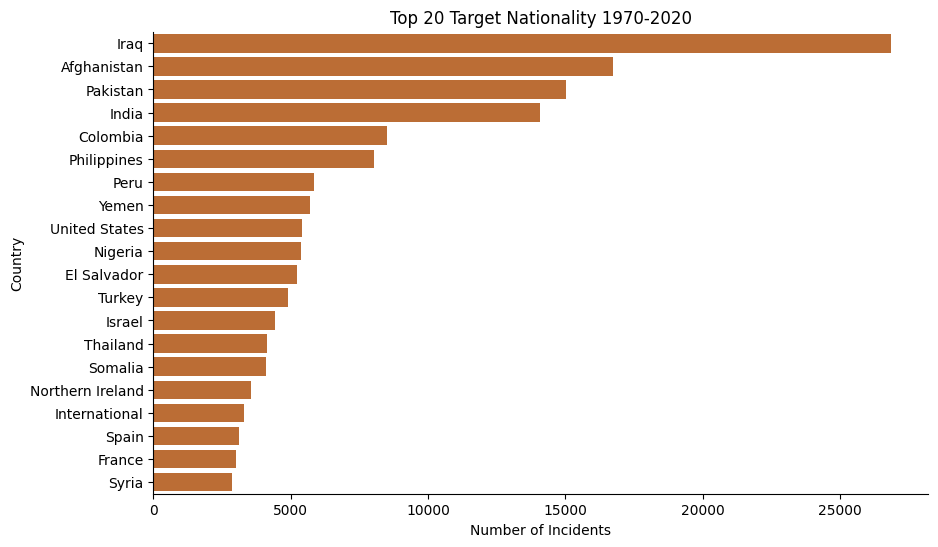

In [16]:
plt.figure(figsize=(10,6))
sns.barplot(x= "eventid", y="natlty1_txt", data=target, color="chocolate", orient="h")
plt.title("Top 20 Target Nationality 1970-2020")
plt.xlabel("Number of Incidents")
plt.ylabel("Country")
sns.despine()
plt.show()

#### Distribution of Incidents by Perpetrator 

In [17]:
### Group Name ###

perpgroup = df.groupby(["gname"]).count().sort_values(by="eventid", ascending=False)[0:20].reset_index()
perpgroup = perpgroup[["gname", "eventid"]]
perpgroup = perpgroup.drop([0])

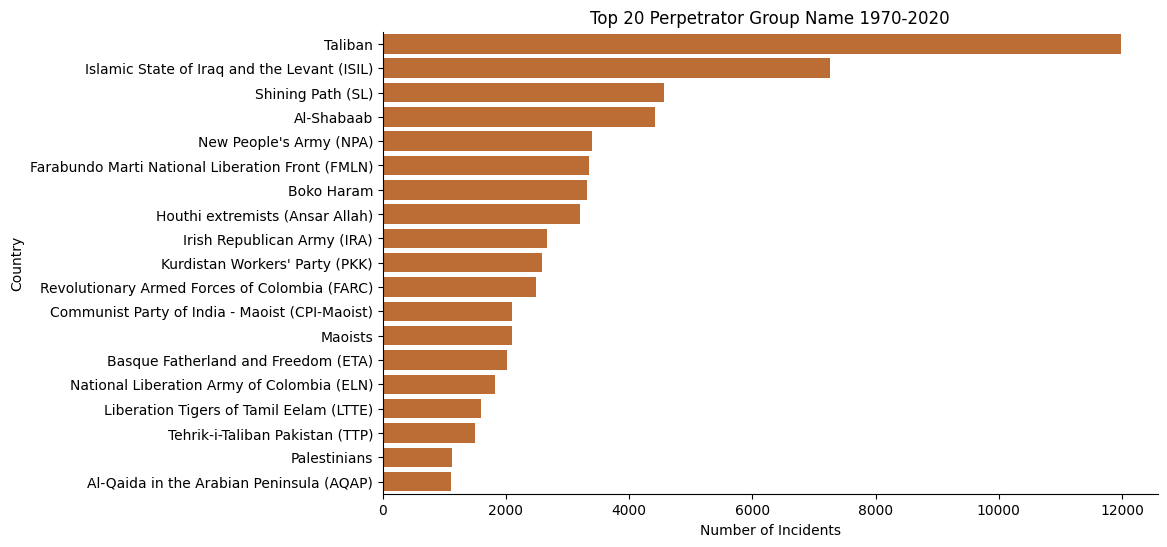

In [18]:
plt.figure(figsize=(10,6))
sns.barplot(x= "eventid", y="gname", data=perpgroup, color="chocolate", orient="h")
plt.title("Top 20 Perpetrator Group Name 1970-2020")
plt.xlabel("Number of Incidents")
plt.ylabel("Country")
sns.despine()
plt.show()

#### Distribution by Fatalities

In [19]:
### Fatalities by Year ###

fatalities_year = df.groupby(["iyear"])["nkill"].sum().reset_index()
fatalities_year = fatalities_year[["iyear", "nkill"]]

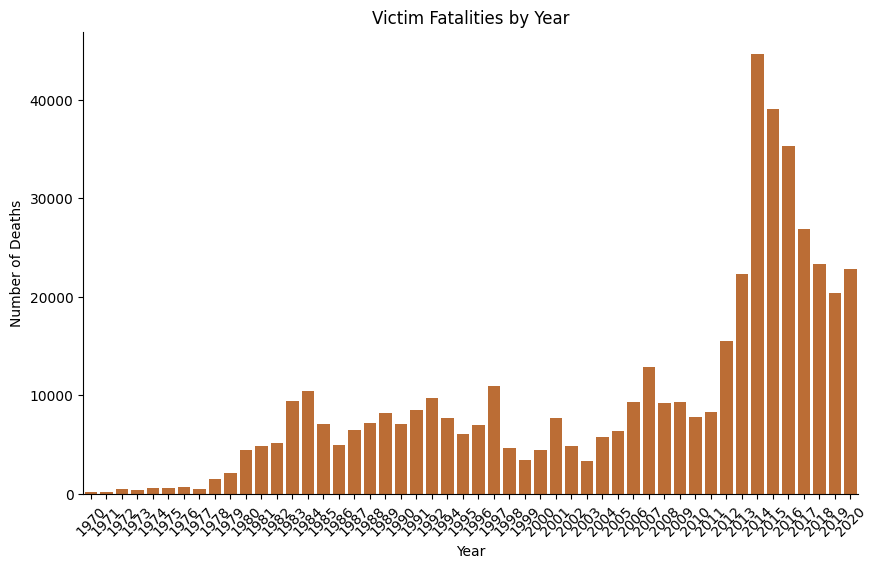

In [20]:
plt.figure(figsize=(10,6))
sns.barplot(x= "iyear", y="nkill", data=fatalities_year, color="chocolate")
plt.title("Victim Fatalities by Year")
plt.xlabel("Year")
plt.xticks(rotation=45)
plt.ylabel("Number of Deaths")
sns.despine()
plt.show()

In [21]:
### Perpetrator Fatalities by Year ###

fatalities_year = df.groupby(["iyear"])["nkillter"].sum().reset_index()
fatalities_year = fatalities_year[["iyear", "nkillter"]]

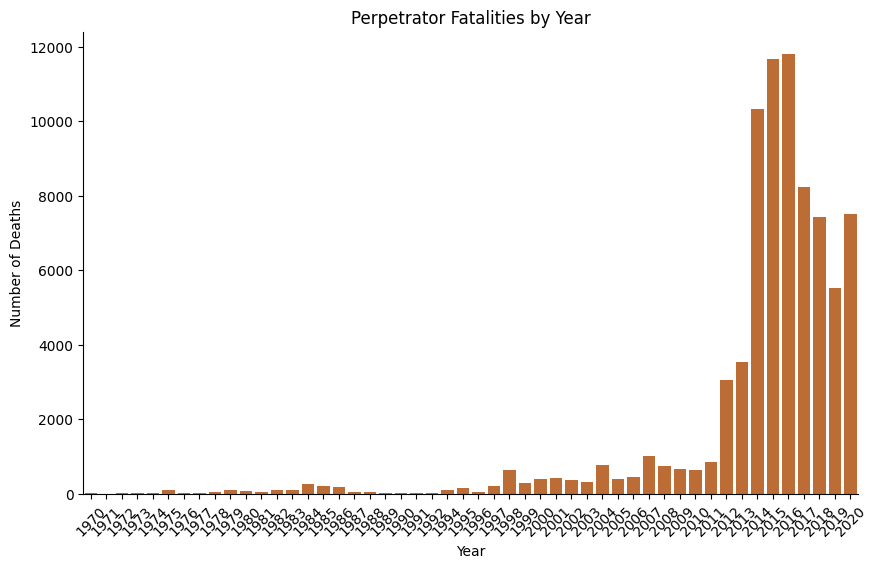

In [355]:
plt.figure(figsize=(10,6))
sns.barplot(x= "iyear", y="nkillter", data=fatalities_year, color="chocolate")
plt.title("Perpetrator Fatalities by Year")
plt.xlabel("Year")
plt.xticks(rotation=45)
plt.ylabel("Number of Deaths")
sns.despine()
plt.show()